In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('Stocks.csv')

1) Calculate the sample daily log-return volatility of the DHER stock.

Enter your result as a percentage, rounded to two decimal places. For example, if your result is 0.03244, enter 3.24 as your result!

In [21]:
# Let's first explore the data
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())
print("\nData types:")
print(df.dtypes)

# Convert Date column to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df = df.sort_values('Date').reset_index(drop=True)
print("\nAfter sorting by date:")
print(df.head())
print(df.tail())

Data shape: (895, 4)

First few rows:
        Date    TUI   DHER    TMV
0  04.7.2025  7.512  22.98  9.650
1  03.7.2025  7.620  23.67  9.670
2  02.7.2025  7.646  23.77  9.435
3  01.7.2025  7.706  23.96  9.485
4  30.6.2025  7.418  22.97  9.555

Last few rows:
          Date      TUI   DHER     TMV
890  07.1.2022  17.9481  85.10  11.395
891  06.1.2022  17.8552  84.86  11.600
892  05.1.2022  17.9249  89.76  11.845
893  04.1.2022  17.7507  92.50  11.950
894  03.1.2022  16.4907  98.86  12.625

Data types:
Date     object
TUI     float64
DHER    float64
TMV     float64
dtype: object

After sorting by date:
        Date      TUI   DHER     TMV
0 2022-01-03  16.4907  98.86  12.625
1 2022-01-04  17.7507  92.50  11.950
2 2022-01-05  17.9249  89.76  11.845
3 2022-01-06  17.8552  84.86  11.600
4 2022-01-07  17.9481  85.10  11.395
          Date    TUI   DHER    TMV
890 2025-06-30  7.418  22.97  9.555
891 2025-07-01  7.706  23.96  9.485
892 2025-07-02  7.646  23.77  9.435
893 2025-07-03  7.620  23.6

In [22]:
# Task 1: Calculate daily log-return volatility of DHER stock

# Calculate daily log returns for DHER
dher_log_returns = np.log(df['DHER'] / df['DHER'].shift(1)).dropna()

# Calculate sample standard deviation (volatility)
dher_daily_volatility = dher_log_returns.std()

print(f"DHER daily log-return volatility: {dher_daily_volatility:.6f}")

DHER daily log-return volatility: 0.043705


In [32]:
# Task 1 continued: Scale volatility for different time periods
# Using the scaling property: volatility scales with square root of time

# (i) Calendar Day - this is already the daily volatility we calculated
calendar_day_volatility = dher_daily_volatility

# (ii) Trading year (252 trading days)
trading_year_volatility = dher_daily_volatility * np.sqrt(252)

# (iii) Calendar year (360 calendar days) 
calendar_year_volatility = dher_daily_volatility * np.sqrt(360)

print(f"(i) Calendar Day: {calendar_day_volatility * 100:.2f}%")
print(f"(ii) Trading year: {trading_year_volatility * 100:.2f}%") 
print(f"(iii) Calendar year: {calendar_year_volatility * 100:.2f}%")

(i) Calendar Day: 4.37%
(ii) Trading year: 69.38%
(iii) Calendar year: 82.92%


2. (a)

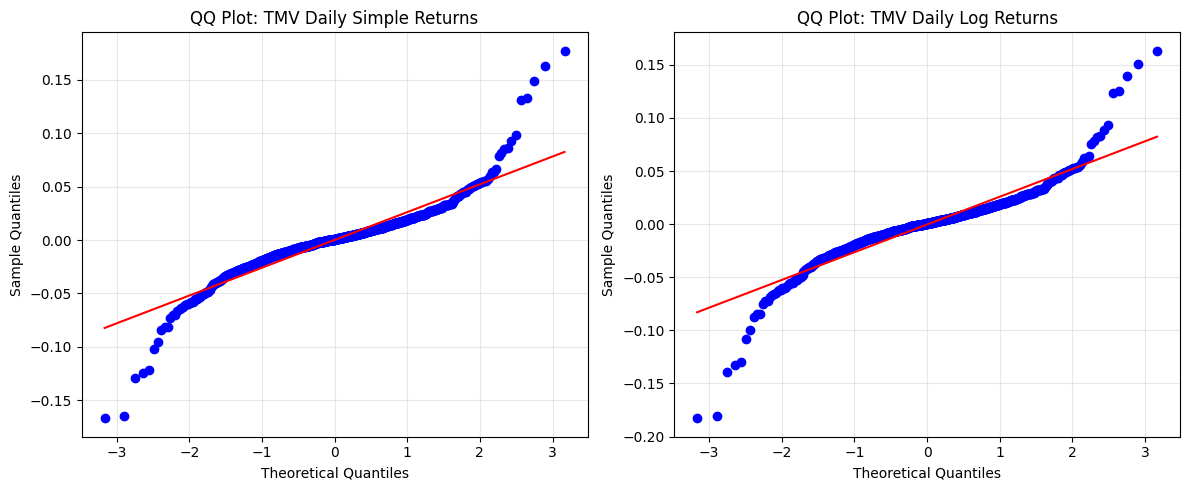

In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate daily simple returns and log returns for TMV
tmv_simple_returns = (df['TMV'] / df['TMV'].shift(1) - 1).dropna()
tmv_log_returns = np.log(df['TMV'] / df['TMV'].shift(1)).dropna()

# Create QQ plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# QQ plot for simple returns
stats.probplot(tmv_simple_returns, dist="norm", plot=ax1)
ax1.set_title('QQ Plot: TMV Daily Simple Returns')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles')
ax1.grid(True, alpha=0.3)

# QQ plot for log returns  
stats.probplot(tmv_log_returns, dist="norm", plot=ax2)
ax2.set_title('QQ Plot: TMV Daily Log Returns')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2. (c)

Now calculate monthly returns by using the closing stock price at the end of each month from January 2022 to June 2025. Do not include July 2025, as the data for that month is incomplete. Once you have calculated the monthly returns, recreate the QQ plot for TMV to assess how well the monthly simple and log returns follow a normal distribution.

Please upload the plot, for example, as a screenshot.



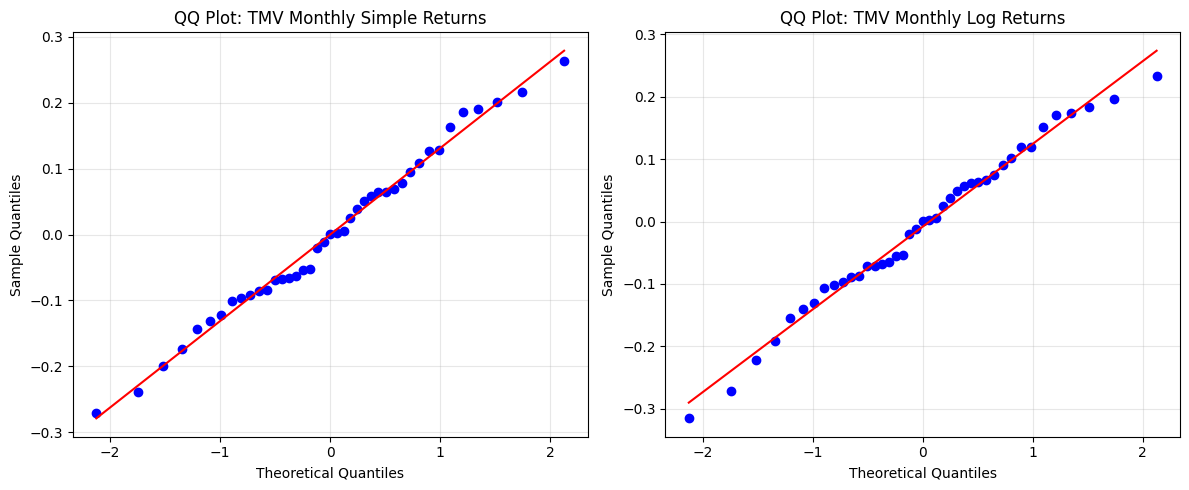

In [25]:
# Task 2(c): Monthly returns QQ plots for TMV (Jan 2022 to June 2025)

# Filter data from Jan 2022 to June 2025 (excluding July 2025)
monthly_data = df[(df['Date'] >= '2022-01-01') & (df['Date'] <= '2025-06-30')].copy()

# Get month-end prices by grouping by year-month and taking the last value
monthly_data['YearMonth'] = monthly_data['Date'].dt.to_period('M')
monthly_prices = monthly_data.groupby('YearMonth')['TMV'].last()

# Calculate monthly simple and log returns
monthly_simple_returns = (monthly_prices / monthly_prices.shift(1) - 1).dropna()
monthly_log_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()

# Create QQ plots for monthly returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# QQ plot for monthly simple returns
stats.probplot(monthly_simple_returns, dist="norm", plot=ax1)
ax1.set_title('QQ Plot: TMV Monthly Simple Returns')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles')
ax1.grid(True, alpha=0.3)

# QQ plot for monthly log returns  
stats.probplot(monthly_log_returns, dist="norm", plot=ax2)
ax2.set_title('QQ Plot: TMV Monthly Log Returns')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Part 3: Mean-Variance Frontiers

Calculate the daily simple returns for each of the three stocks (TUI, DHER, and TMV). These returns will serve as the foundation for the upcoming exercises.

Using the daily returns, calculate the pairwise correlations between the three stocks. Enter your result as a percentage, rounded to one decimal place. For example, if your result is 0.0324, enter 3.2 as your result!



In [31]:
# Part 3: Calculate daily simple returns and correlations

# Calculate daily simple returns for all three stocks
tui_simple_returns = (df['TUI'] / df['TUI'].shift(1) - 1).dropna()
dher_simple_returns = (df['DHER'] / df['DHER'].shift(1) - 1).dropna()
tmv_simple_returns = (df['TMV'] / df['TMV'].shift(1) - 1).dropna()

# Create a DataFrame with all returns
returns_df = pd.DataFrame({
    'TUI': tui_simple_returns,
    'DHER': dher_simple_returns, 
    'TMV': tmv_simple_returns
})

# Calculate pairwise correlations
correlation_matrix = returns_df.corr()
print(correlation_matrix)

           TUI      DHER       TMV
TUI   1.000000  0.333600  0.270776
DHER  0.333600  1.000000  0.321433
TMV   0.270776  0.321433  1.000000


b) Determine the minimum-variance portfolio based on the three stocks and report the portfolio weights allocated to TUI, DHER, and TMV. Enter your result as a percentage, rounded to one decimal place. For example, if your result is 0.0324, enter 3.2 as your result!

In [34]:
# Task 3(b): Determine minimum-variance portfolio weights

# Calculate covariance matrix
cov_matrix = returns_df.cov()
print("Covariance Matrix:")
print(cov_matrix)

# For minimum-variance portfolio: w = (Σ^-1 * 1) / (1^T * Σ^-1 * 1)
# where Σ is the covariance matrix and 1 is a vector of ones

# Invert the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Vector of ones
ones = np.ones((3, 1))

# Calculate minimum-variance weights
numerator = inv_cov_matrix @ ones
denominator = ones.T @ inv_cov_matrix @ ones
weights = numerator / denominator

print(f"\nMinimum-Variance Portfolio Weights:")
print(f"TUI: {weights[0][0]:.6f} ({weights[0][0] * 100:.1f}%)")
print(f"DHER: {weights[1][0]:.6f} ({weights[1][0] * 100:.1f}%)")
print(f"TMV: {weights[2][0]:.6f} ({weights[2][0] * 100:.1f}%)")

# Store weights for later use
mvp_weights = weights.flatten()

Covariance Matrix:
           TUI      DHER       TMV
TUI   0.000910  0.000437  0.000227
DHER  0.000437  0.001885  0.000388
TMV   0.000227  0.000388  0.000774

Minimum-Variance Portfolio Weights:
TUI: 0.407972 (40.8%)
DHER: 0.075763 (7.6%)
TMV: 0.516266 (51.6%)


3. (c) Calculate the return and the standard deviation of the minimum-variance portfolio you constructed in part 3. (b).


In [28]:
# Task 3(c): Calculate return and standard deviation of minimum-variance portfolio

# Portfolio return = weighted average of individual returns
portfolio_returns = returns_df @ mvp_weights

# Portfolio expected return (mean)
mvp_expected_return = portfolio_returns.mean()

# Portfolio standard deviation 
mvp_std = portfolio_returns.std()

# Alternative calculation using matrix formula: σ_p = sqrt(w^T * Σ * w)
mvp_variance_matrix = mvp_weights.T @ cov_matrix @ mvp_weights
mvp_std_matrix = np.sqrt(mvp_variance_matrix)

print(f"Minimum-Variance Portfolio Statistics:")
print(f"Expected Return: {mvp_expected_return:.6f} ({mvp_expected_return * 100:.4f}%)")
print(f"Standard Deviation: {mvp_std:.6f} ({mvp_std * 100:.4f}%)")

print(f"\nVerification using matrix calculation:")
print(f"Standard Deviation (matrix): {mvp_std_matrix:.6f} ({mvp_std_matrix * 100:.4f}%)")

print(f"\nDaily MVP Statistics:")
print(f"Return: {mvp_expected_return:.6f}")
print(f"Standard Deviation: {mvp_std:.6f}")

# For comparison, show individual stock statistics
print(f"\nFor comparison - Individual stock daily statistics:")
print(f"TUI - Return: {returns_df['TUI'].mean():.6f}, Std: {returns_df['TUI'].std():.6f}")
print(f"DHER - Return: {returns_df['DHER'].mean():.6f}, Std: {returns_df['DHER'].std():.6f}")
print(f"TMV - Return: {returns_df['TMV'].mean():.6f}, Std: {returns_df['TMV'].std():.6f}")

Minimum-Variance Portfolio Statistics:
Expected Return: -0.000180 (-0.0180%)
Standard Deviation: 0.022836 (2.2836%)

Verification using matrix calculation:
Standard Deviation (matrix): 0.022836 (2.2836%)

Daily MVP Statistics:
Return: -0.000180
Standard Deviation: 0.022836

For comparison - Individual stock daily statistics:
TUI - Return: -0.000424, Std: 0.030161
DHER - Return: -0.000683, Std: 0.043421
TMV - Return: 0.000087, Std: 0.027814


3. (d)

Plot the mean-variance frontier based on the three assets.

Annualize both the expected returns and volatilities using their scaling rules.
Mark the minimum-variance portfolio on the plot to show its location on the frontier.
Plot the annualized volatility on the x-axis and the annualized return on the y-axis.


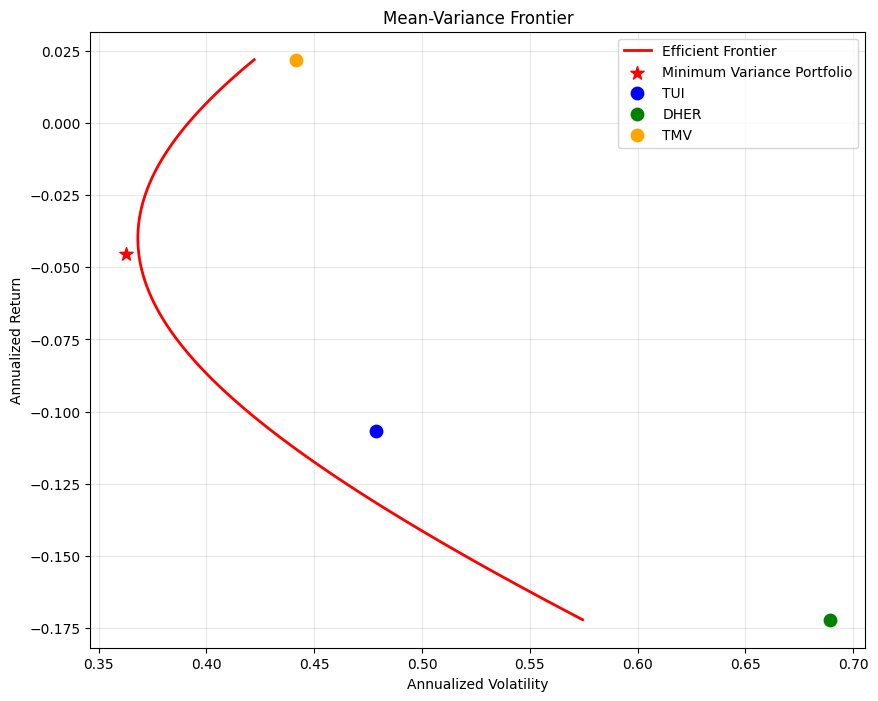

Annualized MVP Statistics:
Return: -0.045285 (-4.5285%)
Volatility: 0.362512 (36.2512%)

Annualized Individual Stock Statistics:
TUI - Return: -0.106825 (-10.6825%), Volatility: 0.478785 (47.8785%)
DHER - Return: -0.172184 (-17.2184%), Volatility: 0.689280 (68.9280%)
TMV - Return: 0.021969 (2.1969%), Volatility: 0.441540 (44.1540%)


In [29]:
# Task 3(d): Plot mean-variance frontier

# Calculate expected returns (means) for each stock
expected_returns = returns_df.mean().values

# Generate portfolio weights for the efficient frontier
# We'll create a range of target returns and find optimal portfolios
min_ret = expected_returns.min()
max_ret = expected_returns.max()
target_returns = np.linspace(min_ret, max_ret, 100)

# For each target return, solve the optimization problem
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, expected_returns):
    return weights @ expected_returns

# Store efficient frontier points
efficient_returns = []
efficient_volatilities = []

for target_ret in target_returns:
    # Constraints: weights sum to 1, portfolio return equals target
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: portfolio_return(w, expected_returns) - target_ret}
    ]
    
    # Initial guess
    x0 = np.array([1/3, 1/3, 1/3])
    
    # Minimize portfolio variance
    result = minimize(portfolio_variance, x0, args=(cov_matrix.values,), 
                     method='SLSQP', constraints=constraints)
    
    if result.success:
        efficient_returns.append(target_ret)
        efficient_volatilities.append(np.sqrt(portfolio_variance(result.x, cov_matrix.values)))

# Convert to annual returns and volatilities (multiply by sqrt(252) for volatility, 252 for returns)
annual_efficient_returns = np.array(efficient_returns) * 252
annual_efficient_volatilities = np.array(efficient_volatilities) * np.sqrt(252)

# Annualize MVP statistics
mvp_annual_return = mvp_expected_return * 252
mvp_annual_volatility = mvp_std * np.sqrt(252)

# Annualize individual stock statistics
annual_stock_returns = expected_returns * 252
annual_stock_volatilities = returns_df.std().values * np.sqrt(252)

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(annual_efficient_volatilities, annual_efficient_returns, 'r-', linewidth=2, label='Efficient Frontier')
plt.scatter(mvp_annual_volatility, mvp_annual_return, color='red', s=100, marker='*', 
           label=f'Minimum Variance Portfolio', zorder=5)

# Plot individual stocks
stock_names = ['TUI', 'DHER', 'TMV']
colors = ['blue', 'green', 'orange']
for i, (name, color) in enumerate(zip(stock_names, colors)):
    plt.scatter(annual_stock_volatilities[i], annual_stock_returns[i], 
               color=color, s=80, marker='o', label=name)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Mean-Variance Frontier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Annualized MVP Statistics:")
print(f"Return: {mvp_annual_return:.6f} ({mvp_annual_return * 100:.4f}%)")
print(f"Volatility: {mvp_annual_volatility:.6f} ({mvp_annual_volatility * 100:.4f}%)")

print(f"\nAnnualized Individual Stock Statistics:")
for i, name in enumerate(stock_names):
    print(f"{name} - Return: {annual_stock_returns[i]:.6f} ({annual_stock_returns[i] * 100:.4f}%), Volatility: {annual_stock_volatilities[i]:.6f} ({annual_stock_volatilities[i] * 100:.4f}%)")

Data from 2024 onward:
Number of observations: 382
Date range: 2024-01-02 00:00:00 to 2025-07-04 00:00:00

2024+ Expected Returns:
TUI: 0.000468
DHER: 0.000741
TMV: -0.000625


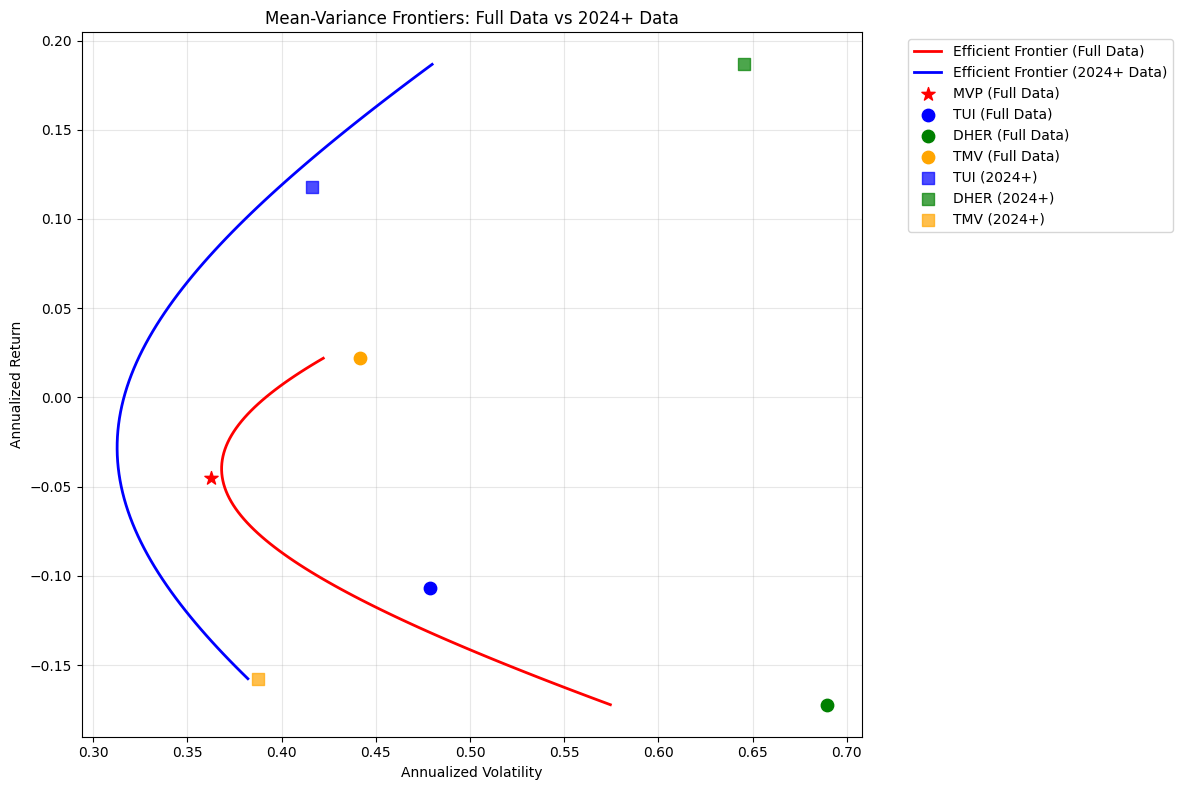


Comparison of 2024+ vs Full Data Statistics:
Stock  Full Data Return 2024+ Return    Full Data Vol   2024+ Vol      
---------------------------------------------------------------------------
TUI           -10.68%         11.79%         47.88%         41.62%
DHER          -17.22%         18.67%         68.93%         64.53%
TMV             2.20%        -15.76%         44.15%         38.74%


In [30]:
# Task 3(f): Add mean-variance frontier for data from January 2024 onward

# Filter data from January 2024 onward
df_2024 = df[df['Date'] >= '2024-01-01'].copy()

# Calculate daily simple returns for 2024+ data
tui_returns_2024 = (df_2024['TUI'] / df_2024['TUI'].shift(1) - 1).dropna()
dher_returns_2024 = (df_2024['DHER'] / df_2024['DHER'].shift(1) - 1).dropna()
tmv_returns_2024 = (df_2024['TMV'] / df_2024['TMV'].shift(1) - 1).dropna()

returns_2024_df = pd.DataFrame({
    'TUI': tui_returns_2024,
    'DHER': dher_returns_2024,
    'TMV': tmv_returns_2024
})

print(f"Data from 2024 onward:")
print(f"Number of observations: {len(returns_2024_df)}")
print(f"Date range: {df_2024['Date'].min()} to {df_2024['Date'].max()}")

# Calculate statistics for 2024+ data
expected_returns_2024 = returns_2024_df.mean().values
cov_matrix_2024 = returns_2024_df.cov()

print(f"\n2024+ Expected Returns:")
for i, name in enumerate(stock_names):
    print(f"{name}: {expected_returns_2024[i]:.6f}")

# Generate efficient frontier for 2024+ data
min_ret_2024 = expected_returns_2024.min()
max_ret_2024 = expected_returns_2024.max()
target_returns_2024 = np.linspace(min_ret_2024, max_ret_2024, 100)

efficient_returns_2024 = []
efficient_volatilities_2024 = []

for target_ret in target_returns_2024:
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: portfolio_return(w, expected_returns_2024) - target_ret}
    ]
    
    x0 = np.array([1/3, 1/3, 1/3])
    
    result = minimize(portfolio_variance, x0, args=(cov_matrix_2024.values,), 
                     method='SLSQP', constraints=constraints)
    
    if result.success:
        efficient_returns_2024.append(target_ret)
        efficient_volatilities_2024.append(np.sqrt(portfolio_variance(result.x, cov_matrix_2024.values)))

# Annualize 2024+ frontier
annual_efficient_returns_2024 = np.array(efficient_returns_2024) * 252
annual_efficient_volatilities_2024 = np.array(efficient_volatilities_2024) * np.sqrt(252)

# Create the combined plot
plt.figure(figsize=(12, 8))

# Plot original frontier (full data)
plt.plot(annual_efficient_volatilities, annual_efficient_returns, 'r-', linewidth=2, 
         label='Efficient Frontier (Full Data)')

# Plot 2024+ frontier in blue
plt.plot(annual_efficient_volatilities_2024, annual_efficient_returns_2024, 'b-', linewidth=2, 
         label='Efficient Frontier (2024+ Data)')

# Plot MVP from full data
plt.scatter(mvp_annual_volatility, mvp_annual_return, color='red', s=100, marker='*', 
           label=f'MVP (Full Data)', zorder=5)

# Plot individual stocks from full data
for i, (name, color) in enumerate(zip(stock_names, colors)):
    plt.scatter(annual_stock_volatilities[i], annual_stock_returns[i], 
               color=color, s=80, marker='o', label=f'{name} (Full Data)')

# Plot individual stocks from 2024+ data
annual_stock_returns_2024 = expected_returns_2024 * 252
annual_stock_volatilities_2024 = returns_2024_df.std().values * np.sqrt(252)

for i, (name, color) in enumerate(zip(stock_names, colors)):
    plt.scatter(annual_stock_volatilities_2024[i], annual_stock_returns_2024[i], 
               color=color, s=80, marker='s', alpha=0.7, label=f'{name} (2024+)')

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Mean-Variance Frontiers: Full Data vs 2024+ Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nComparison of 2024+ vs Full Data Statistics:")
print(f"{'Stock':<6} {'Full Data Return':<15} {'2024+ Return':<15} {'Full Data Vol':<15} {'2024+ Vol':<15}")
print("-" * 75)
for i, name in enumerate(stock_names):
    print(f"{name:<6} {annual_stock_returns[i]*100:>13.2f}% {annual_stock_returns_2024[i]*100:>13.2f}% {annual_stock_volatilities[i]*100:>13.2f}% {annual_stock_volatilities_2024[i]*100:>13.2f}%")

3. (f)

On the plot you created in part 3. (d), add the mean-variance frontier calculated using only data from January 2024 onward (still all three stocks). Display this new frontier as a blue curve.

